In [18]:
import json
import pandas as pd
import C2Analyse
import matplotlib.pyplot as plt

In [19]:
df_athletes = C2Analyse.load_C2scrape_data("output/C2Athletes.json")
df_athletes.index.set_names("profile_id", inplace=True)
df_extended = C2Analyse.load_C2scrape_data("output/C2Extended.json")
df_extended.index.set_names("workout_id", inplace=True)
df_workouts = C2Analyse.load_C2scrape_data("output/C2Workouts.json")
df_workouts.index.set_names("workout_id", inplace=True)

In [20]:
# print(df_athletes)

In [21]:
# print(df_extended)

In [22]:
# print(df_workouts)

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747


<AxesSubplot:title={'center':'Indoor Rowing Machine: Workouts by Event'}, xlabel='event'>

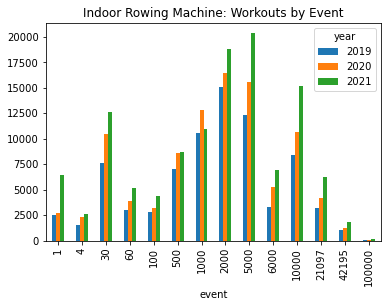

In [41]:
#get basic stats:

print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")
df_workouts_by_year_event = df_workouts[(df_workouts["rower"] == "rower") & (df_workouts["machine"] == "rower")][["event","year"]].value_counts().unstack(level=-1)

df_workouts_by_year_event.plot.bar(title="Indoor Rowing Machine: Workouts by Event")

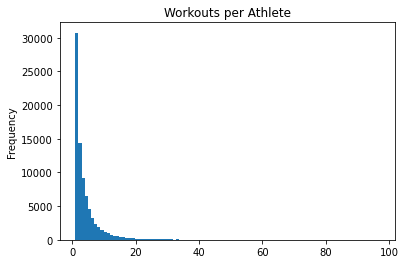

In [25]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)

#why are there less rows than workouts? Did we fail to get some athlete profiles? Can do an outer merge to find ones with empty profile data and check. Maybe profiles deleted xmax=20 xticks=range(0,xmax,2)

df_aw_count = df_athletes_workouts["profile_id"].value_counts()

bins = df_aw_count[0].max() #set bin size to 1
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete")

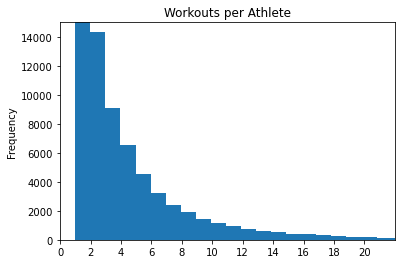

In [26]:
ymax = 15000
xmax = 22
num_ticks = 10
xticks=range(0,xmax,int(round(xmax/num_ticks,0)))
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete", ylim=[0,ymax], xlim=[0,xmax], xticks=xticks)